In [1]:
import numpy as np
from scipy.signal import argrelmax, argrelmin
from scipy import constants

In [2]:
# 減衰定数
a = np.array([1, 1])

# 結合効率
K = np.array([0.65, 0.17, 0.43])

# 結合損
eta = 1

# リング周長
L =  np.array([2.284e-4, 2.284e-4])

# 屈折率
n = 3.3938

# 屈折率変化
dn = [0, 0, 0]

# 波長レンジ
l = np.arange(1545e-9, 1555e-9, 1e-12)

$$
C(K) = \frac{1}{-i \cdot \eta \cdot \sqrt{K}} \cdot
\begin{bmatrix}
1 & - \eta \cdot \sqrt{\eta - K} \\
(\sqrt{\eta - K}) \cdot \eta & - \eta^2
\end{bmatrix}
$$

In [3]:
def C(k):
    return 1 / (-1j * eta * np.sqrt(k)) * np.matrix([
        [1, - eta * np.sqrt(eta - k)],
        [np.sqrt(eta - k) * eta, - eta**2]
    ])

$$
R(a, L, \lambda) =
\begin{bmatrix}
\frac{e^{\frac{i \pi \cdot L \cdot n}{\lambda}}}{\sqrt{a}} & 0 \\
0 & \sqrt{a} \cdot e^{\frac{-i \pi \cdot L \cdot n}{\lambda}}
\end{bmatrix}
$$

In [4]:
def R(a, L, l):
    return np.matrix([
        [np.exp(1j * np.pi * L * n / l ) / np.sqrt(a), 0],
        [0, np.exp(-1j * np.pi * L * n / l ) * np.sqrt(a)]
    ])

$$
M(a, K, L, \lambda) = C(K_N) R(a_N, L_N, \lambda) C(K_{N-1}) R(a_{N-1}, L_{N-1}, \lambda) \cdots C(K_1) R(a_1, L_1, \lambda) C(K_0) \\
a = a_1, \cdots , a_N \\
K = K_0, \cdots , K_N \\
L = L_1, \cdots , L_N
$$

In [5]:
def reverse(arr):
    return arr[::-1]

In [6]:
def M (a, K, L, l):
    product = 1
    for _K, _a, _L in zip(reverse(K[1:]), reverse(a), reverse(L)):
        product = product * C(_K) *  R(_a, _L, l)
    product = product * C(K[0])
    return product

$$
D(a, K, L, \lambda) = \frac{1}{M(a, K, L, \lambda)_{0,0}}
$$

In [7]:
def D(a, K, L, l):
    return 1 / M (a, K, L, l)[0, 0]

In [8]:
_y = 20 * np.log10(np.abs(D(a, K, L, l)))
y = _y.reshape(_y.size)
maxid = argrelmax(y, order=120)[0]

In [17]:
print("FSR1:", l[maxid[1]] - l[maxid[0]] )
print("FSR2:", l[maxid[2]] - l[maxid[1]])

FSR1: 2.9810000000822866e-09
FSR2: 3.2210000000889115e-09


In [18]:
l[maxid]
y[maxid]

array([-0.06718788, -0.06718779, -0.06718835])

In [19]:
y[maxid].argsort()[::-1]

array([1, 0, 2])

In [20]:
result_y = np.fft.ifft(np.exp(-2j * np.pi * constants.c / y))
result_x = np.arange(y_.size) / constants.c * 1e12

NameError: name 'y_' is not defined

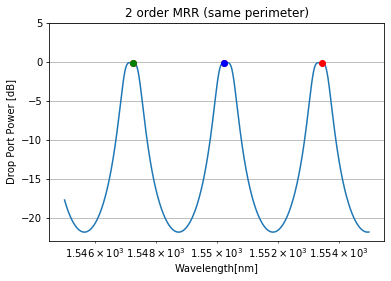

In [21]:
import matplotlib.pyplot as plt
plt.semilogx(l*1e9, y)
plt.xlabel('Wavelength[nm]')
plt.ylabel('Drop Port Power [dB]')
plt.title('{} order MRR (same perimeter)'.format(L.size))
plt.plot(l[maxid] * 1e9, y[maxid], "ro")
loss1_id = y[maxid].argsort()[::-1][0]
plt.plot(l[maxid[loss1_id]]  * 1e9, y[maxid[loss1_id]], 'bo')
loss2_id = y[maxid].argsort()[::-1][1]
plt.plot(l[maxid[loss2_id]]  * 1e9, y[maxid[loss2_id]], 'go')
plt.axis([None, None, None, 5])
plt.grid()
plt.show()

In [22]:
plt.plot(result_x, np.abs(result_y))

plt.show()

NameError: name 'result_x' is not defined